Assignment_1-IS_2023

Participants:
- Reza Barzgar (110115742)
- Hamed Waezi (110117130)
- Delaram Rajaei (110124422)

In [170]:
import random
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold

The project will utilize the following functions.

In [171]:
def generate_dataset(datasize=5000):
  x = np.random.normal(0, 1, datasize).reshape(-1, 1)
  eps = np.random.normal(0, 0.25, datasize).reshape(-1, 1)
  y = -1 + 0.5*x - 2*x**2 + 0.3*x**3 + eps
  return x, y

def build_design_matrix(x, degree):
  X = np.column_stack([np.power(x, i) for i in range(degree + 1)])
  return X

def get_ols_coefficients(X, y, degree=1):
  X = build_design_matrix(X, degree)
  XT = np.transpose(X)
  a = np.linalg.inv(np.matmul(XT, X))
  b= np.matmul(a, XT)
  return np.matmul(b, y)

def predict(x, coeffiecients, degree=1):
  return np.dot(build_design_matrix(x, degree), coeffiecients)

**Part1**

Generating 5000 synthetic data points (x, y)
In this code, the *np.random.normal()* function from the NumPy library is used to generate 5000 random numbers following a Gaussian distribution with mean 0 and variance 1 and mean 0 and variance 0.25. The resulting values are stored in the vector x and eps.


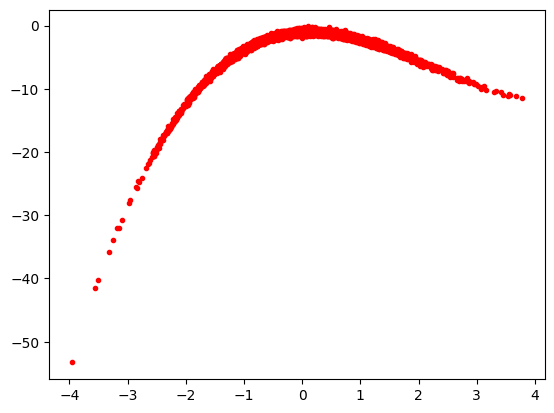

In [172]:
x, y = generate_dataset()
plt.plot(x, y, ".r")

In this code, we manually construct the design matrix X by stacking the columns of ones, x, x^2, and x^3. We calculate the coefficients using the OLS equation and then use these coefficients to make predictions by multiplying X with the coefficients. Finally, we evaluate the performance by calculating the mean squared error (MSE) between the actual y values and the predicted y values and plot the results. The scatter plots for each fold, showing the predicted values and the true values, are displayed in a grid layout using matplotlib.

Fold 0 loss: 11.424975183214784
Fold 1 loss: 7.521413393148458
Fold 2 loss: 8.268639573585249
Fold 3 loss: 12.027573319264464
Fold 4 loss: 7.454095084582363


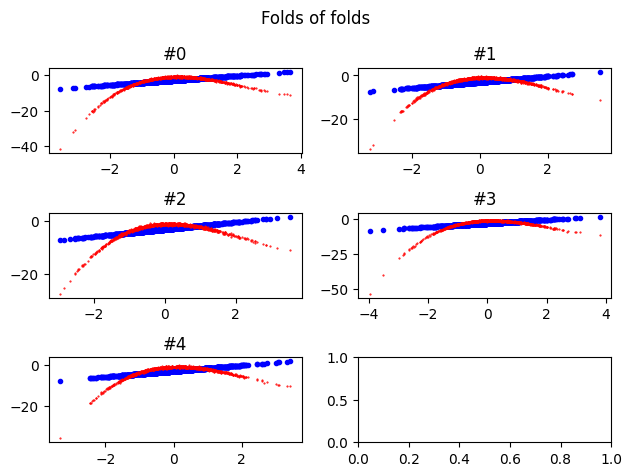

In [173]:
kfold = KFold(splits, shuffle=True)

splits = 5
figures_columns = 2
fig, axs = plt.subplots((splits//figures_columns) + (splits%figures_columns > 0), figures_columns)

for fold, (train_index, test_index) in enumerate(kfold.split(x)):
  
  # Calculate the coefficients using OLS equation: β = (X^T*X)^-1 * X^T*y
  x_train, y_train = x[train_index], y[train_index]
  coeffiecients = get_ols_coefficients(x_train, y_train)

  # Predict the values
  x_val, y_val = x[test_index], y[test_index]
  y_hat = predict(x_val, coeffiecients)

  # Calculate loss and ploting the results
  print(f"Fold {fold} loss: {mean_squared_error(y_val, y_hat)}")
  axs[fold//figures_columns][fold%figures_columns].plot(x_val, y_hat, ".b")
  axs[fold//figures_columns][fold%figures_columns].plot(x_val, y_val, ".r", markersize=1)
  axs[fold//figures_columns][fold%figures_columns].set_title(f"#{fold}")

fig.suptitle("Folds of folds")
fig.tight_layout(pad=1)
plt.show()

**Part2**

 After gerating the dataset, the train_test_split function from sklearn.model_selection is used to split the data into training and test sets.

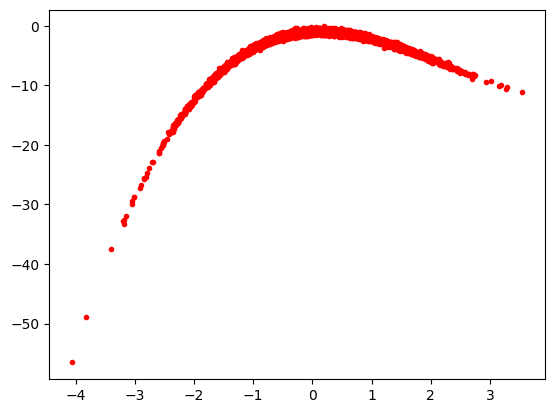

In [174]:
x, y = generate_dataset(5000)
plt.plot(x, y, ".r")
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

10-fold cross-validation is performed using the KFold class from sklearn.model_selection. The data is split into 10 folds, and for each fold, the training and test sets are generated. The rest of the code remains the same as part1, including calculating the weight vector using the get_ols_coefficients function, predicting the value, and calculate MSE. After that the best degree is updated based on the best average MSE over the folds.

Without CV -> degree: 1, MSE: 9.087788916105664
Without CV -> degree: 2, MSE: 0.6614204827873766
Without CV -> degree: 3, MSE: 0.06155082044584404
Without CV -> degree: 4, MSE: 0.061546769647549654
Without CV -> degree: 5, MSE: 0.061589819162563356
Without CV -> degree: 6, MSE: 0.0620009832373848
Without CV -> degree: 7, MSE: 0.06230765921137907
Without CV -> degree: 8, MSE: 0.06242703600475423
best model: degree: 4, MSE: 0.061546769647549654


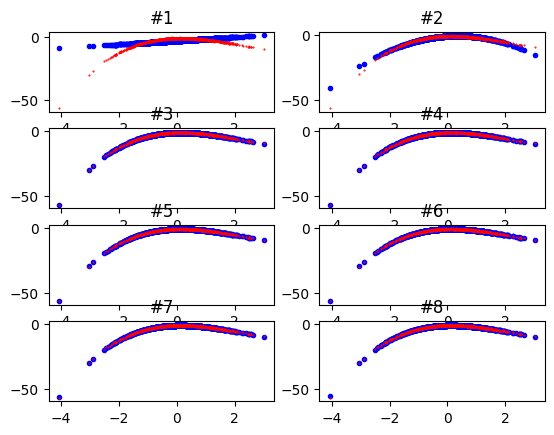

In [175]:
max_degree = 8

fig, axs = plt.subplots((max_degree//figures_columns) + (max_degree%figures_columns > 0), figures_columns)

best_degree_degree_loss = (-1, 100000000)

for degree in range(1, max_degree + 1):
  coefficients = get_ols_coefficients(x_train, y_train, degree)
  y_hat = predict(x_test, coefficients, degree)
  mse = mean_squared_error(y_test, y_hat)

  if mse < best_degree_degree_loss[1]:
    best_degree_degree_loss = (degree, mse)
  print(f"Without CV -> degree: {degree}, MSE: {mse}")
  temp = degree - 1
  axs[temp//figures_columns][temp%figures_columns].plot(x_test, y_hat, ".b")
  axs[temp//figures_columns][temp%figures_columns].plot(x_test, y_test, ".r", markersize=1)
  axs[temp//figures_columns][temp%figures_columns].set_title(f"#{degree}")

print(f"best model: degree: {best_degree_degree_loss[0]}, MSE: {best_degree_degree_loss[1]}")
plt.show()

With CV -> Degree: 1, MSE: 9.087887828636308
With CV -> Degree: 2, MSE: 0.665420704793438
With CV -> Degree: 3, MSE: 0.061557088749523134
With CV -> Degree: 4, MSE: 0.06155956968511658
With CV -> Degree: 5, MSE: 0.06156822186412806
With CV -> Degree: 6, MSE: 0.06182789473314404
With CV -> Degree: 7, MSE: 0.062184256366720383
With CV -> Degree: 8, MSE: 0.06244882161159167
best degree: 3, MSE: 0.061557088749523134
[[-0.99233707]
 [ 0.49768826]
 [-2.00316391]
 [ 0.30029965]]


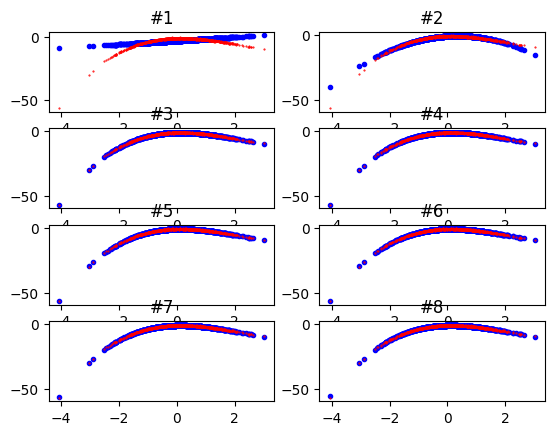

In [177]:
# Choose the maximum polynomial degree to consider
mse_values = []
coeffiecientss = []
# Perform cross-validation using 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for degree in range(1, max_degree + 1):
    mse_sum = 0
    best_coeffiecients = None
    best_error = 100000000
    for train_index, val_index in kf.split(x_train):
        x_cv_train, x_cv_val = x_train[train_index], x_train[val_index]
        y_cv_train, y_cv_val = y_train[train_index], y_train[val_index]

        # Calculate the weight vector using the get_ols_coefficients function
        coeffiecients = get_ols_coefficients(x_cv_train, y_cv_train, degree)

        # Predict the values
        y_hat = predict(x_cv_val, coeffiecients, degree)

        # Calculate the mean squared error (MSE)
        mse = mean_squared_error(y_cv_val, y_hat)
        if mse < best_error:
          best_coeffiecients = coeffiecients
        mse_sum += mse
    coeffiecientss.append(best_coeffiecients)


figures_columns = 2
fig, axs = plt.subplots((max_degree//figures_columns) + (max_degree%figures_columns > 0), figures_columns)
best_degree_degree_loss = (-1, 100000000)

for degree, coeffiecients in enumerate(coeffiecientss, 1):
  y_hat = predict(x_test, coeffiecients, degree)
  mse = mean_squared_error(y_test, y_hat)
  temp = degree-1
  axs[temp//figures_columns][temp%figures_columns].plot(x_test, y_hat, ".b")
  axs[temp//figures_columns][temp%figures_columns].plot(x_test, y_test, ".r", markersize=1)
  axs[temp//figures_columns][temp%figures_columns].set_title(f"#{degree}")
  print(f"With CV -> Degree: {degree}, MSE: {mse}")
  if mse < best_degree_degree_loss[1]:
    best_degree_degree_loss = (degree, mse)

print(f"best degree: {best_degree_degree_loss[0]}, MSE: {best_degree_degree_loss[1]}")
print(coeffiecientss[best_degree_degree_loss[0]-1])

# fig.suptitle("Data points of different degrees")
# fig.tight_layout(pad=1)
plt.show()

**Question: Compare your results of OLS with or without cross-validation scheme.**

First, we run the code with and without cross-validation to find the best polynomial degree d.

Here are the results:

*   *Without cross-validation*:* degree: 4 and MSE: 0.061546769647549654
*   *With cross-validation*:* degree: 3 and MSE: 0.061557088749523134

The results show that degree 3 has the least loss and shows a better result than degree 2. In higher degrees, the coefficients of those higher degrees converge to zero. As a result, higher degrees than 3 have less influence on our prediction.

Sometimes, due to data randomness, the results can be altered to higher degrees, such as 4. The difference between the MSE of degrees 3 and more will be less than 0.0001.

---

**Question: Use your creativity and do whatever experiments you want to test, and then tell me whatever story your experiments told you.**

The model is able to learn that the impact of higher degree features are negligible, which is why the coefficient becomes the least minimal. It appears that the model has found that, beyond a certain degree, the effect of a higher degree on the outcome is insignificant. 